In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df1, df2 = pd.read_csv("ttrain.csv"), pd.read_csv("ttest.csv")
df1.shape, df2.shape

((891, 12), (418, 11))

In [3]:
df = df1.append(df2)

In [4]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
219,220,0.0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
271,1163,NaN,3,"Fox, Mr. Patrick",male,NaN,0,0,368573,7.7500,NaN,Q
346,347,1.0,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.0000,NaN,S
445,446,1.0,1,"Dodge, Master. Washington",male,4.0,0,2,33638,81.8583,A34,S
421,422,0.0,3,"Charters, Mr. David",male,21.0,0,0,A/5. 13032,7.7333,NaN,Q
295,296,0.0,1,"Lewy, Mr. Ervin G",male,NaN,0,0,PC 17612,27.7208,NaN,C
817,818,0.0,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C
212,1104,NaN,2,"Deacon, Mr. Percy William",male,17.0,0,0,S.O.C. 14879,73.5000,NaN,S
10,11,1.0,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
370,1262,NaN,2,"Giles, Mr. Edgar",male,21.0,1,0,28133,11.5000,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [7]:
del df['Cabin'] # Too empty

In [8]:
df.Embarked.value_counts(normalize=True)

S    0.699311
C    0.206580
Q    0.094109
Name: Embarked, dtype: float64

In [9]:
df.Name.value_counts()

Kelly, Mr. James                     2
Connolly, Miss. Kate                 2
Widegren, Mr. Carl/Charles Peter     1
Rowe, Mr. Alfred G                   1
McCarthy, Miss. Catherine Katie""    1
                                    ..
Elsbury, Mr. William James           1
Hamalainen, Mrs. William (Anna)      1
Carter, Miss. Lucile Polk            1
Patchett, Mr. George                 1
Adahl, Mr. Mauritz Nils Martin       1
Name: Name, Length: 1307, dtype: int64

In [10]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Don           1
Lady          1
Capt          1
Dona          1
Jonkheer      1
Countess      1
Mme           1
Sir           1
Name: Title, dtype: int64

In [11]:
df['Title'] = df['Title'].replace(['Ms', 'Mlle'], 'Miss')
df['Title'] = df['Title'].replace(['Mme', 'Countess', 'Lady', 'Dona'], 'Mrs')
df['Title'] = df['Title'].replace(['Dr', 'Major', 'Col', 'Sir', 'Rev', 'Jonkheer', 'Capt', 'Don'], 'Mr')

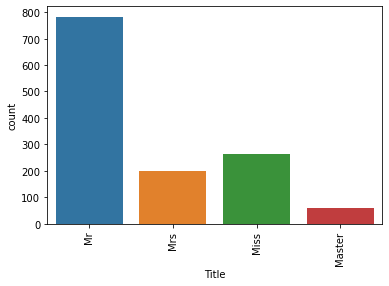

In [12]:
sns.countplot(df['Title'])
plt.xticks(rotation=90);

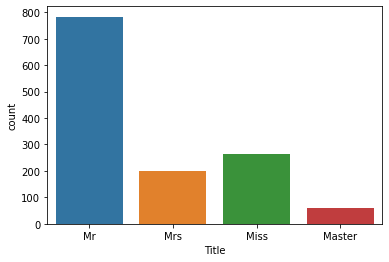

In [13]:
sns.countplot(df["Title"]);

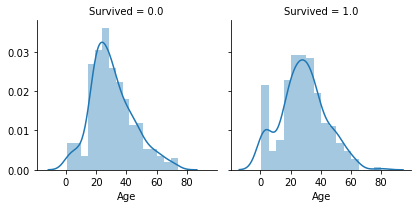

In [16]:
age_surv = sns.FacetGrid(df, col='Survived')
age_surv = age_surv.map(sns.distplot, 'Age')

In [17]:
df['Age'].fillna(df.groupby('Title')['Age'].transform('median'), inplace=True)
df.groupby('Title')['Age'].transform('median')

0      30.0
1      35.5
2      22.0
3      35.5
4      30.0
       ... 
413    30.0
414    35.5
415    30.0
416    30.0
417     4.0
Name: Age, Length: 1309, dtype: float64

In [18]:
df['Senior'] = df['Age'].map(lambda s:1 if s>70 else 0)

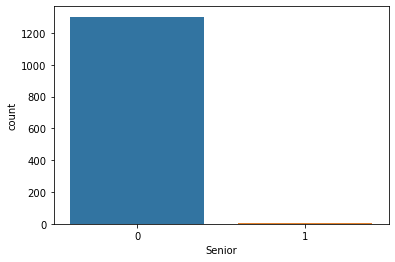

In [19]:
sns.countplot(df["Senior"]);

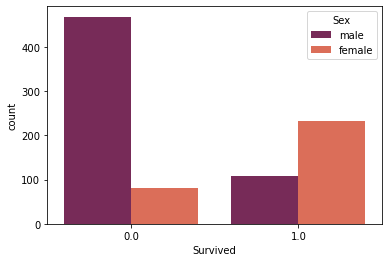

In [20]:
sns.countplot(x='Survived', data=df, hue='Sex', palette='rocket');

In [21]:
df.groupby('Sex')['Age'].mean()

Sex
female    28.349979
male      30.210059
Name: Age, dtype: float64

In [22]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Senior
count,1309.000000,891.000000,1309.000000,1309.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.547876,0.498854,0.385027,33.295479,0.004584
std,378.020061,0.486592,0.837836,13.154383,1.041658,0.865560,51.758668,0.067573
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,0.000000
75%,982.000000,1.000000,3.000000,35.500000,1.000000,0.000000,31.275000,0.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [23]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
Title            0
Senior           0
dtype: int64

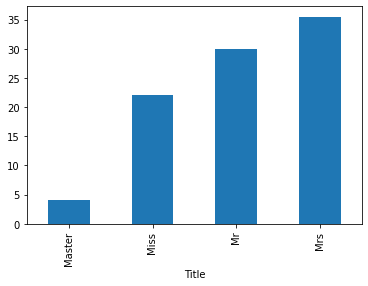

In [24]:
df.groupby("Title")["Age"].median().plot.bar();

In [25]:
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [26]:
df['Family'] = df['SibSp'] + df['Parch'] + 1

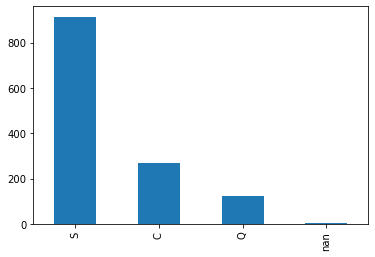

In [27]:
df.Embarked.value_counts(dropna=False).plot(kind='bar');

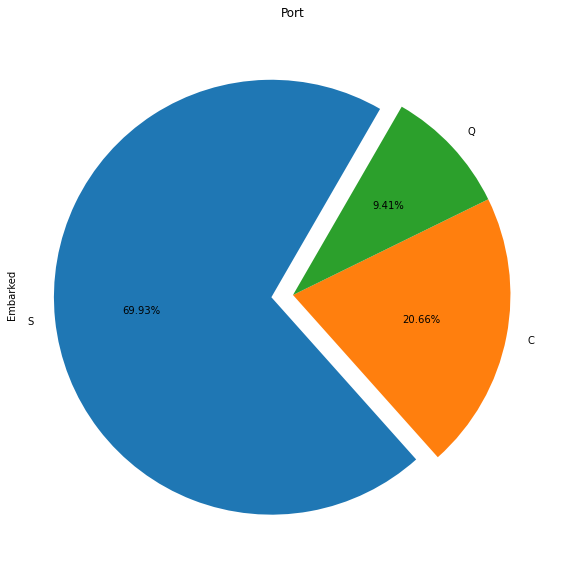

In [28]:
plt.figure(figsize=(10,10))
df['Embarked'].value_counts().plot.pie(autopct='%1.2f%%', startangle=60, explode=(0.1,0,0))
plt.title('Port');

In [29]:
df['Embarked'] = df['Embarked'].fillna('S')

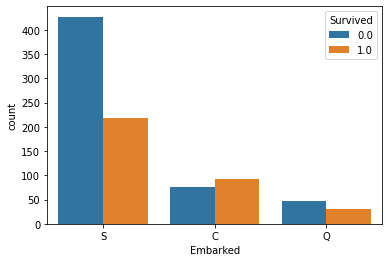

In [30]:
sns.countplot(x='Embarked', hue='Survived', data=df);

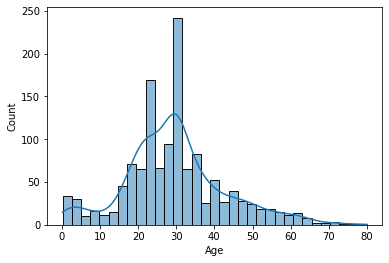

In [31]:
sns.histplot(df["Age"],kde=True);

In [32]:
df.Family.value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

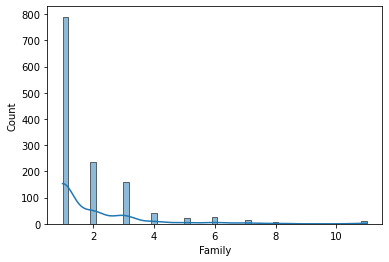

In [33]:
sns.histplot(df["Family"],kde=True);

In [34]:
df['Single'] = df.Family<2
df['Small'] = (df.Family>1)&(df.Family<5)
df['Medium'] = (df.Family>4)&(df.Family<7)
df['Large'] = df.Family>6

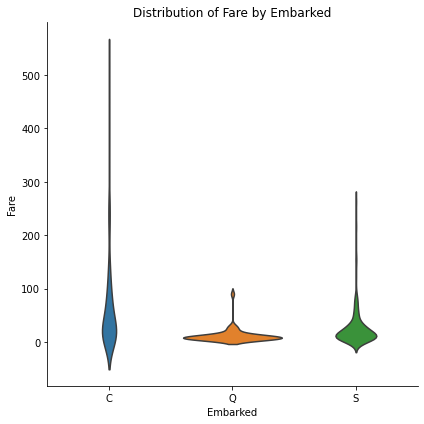

In [35]:
sns.catplot(x='Embarked', y='Fare', kind='violin', inner=None, data=df, height=6, order=['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout();

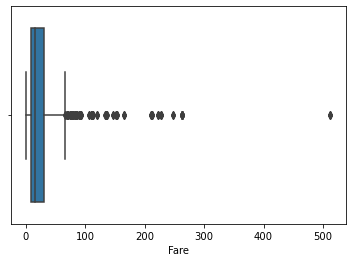

In [36]:
sns.boxplot(df['Fare']);

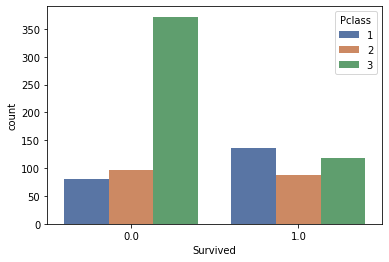

In [37]:
sns.countplot(x='Survived', data=df, hue='Pclass', palette='deep');

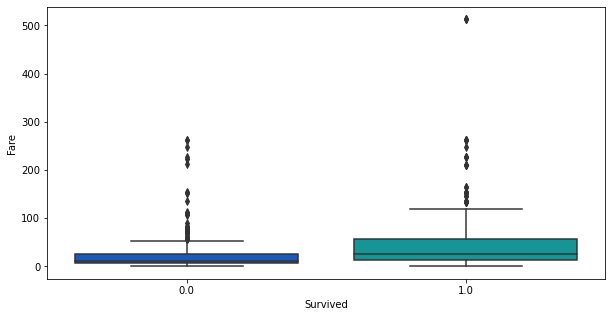

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Survived', y='Fare', data=df, palette='winter');

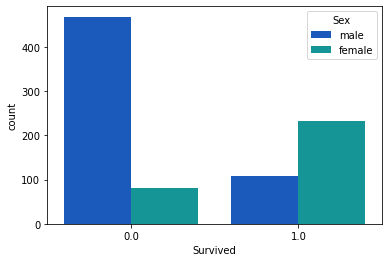

In [39]:
sns.countplot(x='Survived', data=df, hue='Sex', palette='winter');

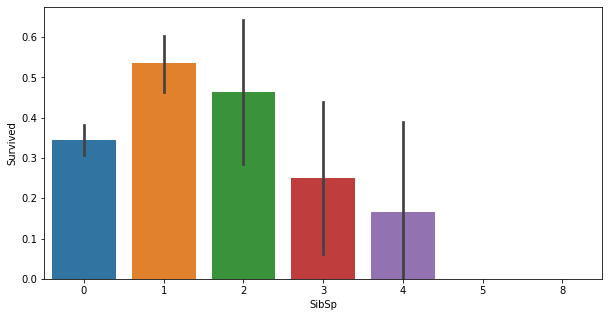

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x=df['SibSp'], y=df['Survived']);

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Embarked     1309 non-null   object 
 11  Title        1309 non-null   object 
 12  Senior       1309 non-null   int64  
 13  Family       1309 non-null   int64  
 14  Single       1309 non-null   bool   
 15  Small        1309 non-null   bool   
 16  Medium       1309 non-null   bool   
 17  Large        1309 non-null   bool   
dtypes: bool(4), float64(3), int64(6), object(5)
memor

In [42]:
df.drop(['PassengerId', 'Ticket', 'Name'], axis=1, inplace=True)

In [43]:
df=pd.get_dummies(df,drop_first=True)

In [44]:
df.shape

(1309, 18)

In [45]:
x, y = df[:891].drop("Survived",axis=1), df[:891][["Survived"]]

In [46]:
x.shape, y.shape

((891, 17), (891, 1))

In [47]:
model=Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [48]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [50]:
x=np.asarray(x).astype(np.int)

y=np.asarray(y).astype(np.int)

In [51]:
history=model.fit(x,y,epochs=150,batch_size=10,verbose=1)

Epoch 1/150
90/90 [==============================] - 1s 1ms/step - loss: 0.7033 - accuracy: 0.6861
Epoch 2/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6000 - accuracy: 0.6971
Epoch 3/150
90/90 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.6778
Epoch 4/150
90/90 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.7117
Epoch 5/150
90/90 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.6917
Epoch 6/150
90/90 [==============================] - 0s 1ms/step - loss: 0.5615 - accuracy: 0.7181
Epoch 7/150
90/90 [==============================] - 0s 1ms/step - loss: 0.5046 - accuracy: 0.7538
Epoch 8/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4685 - accuracy: 0.7847
Epoch 9/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7726
Epoch 10/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.8145
Epoch 11/

90/90 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8411
Epoch 83/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8375
Epoch 84/150
90/90 [==============================] - 0s 2ms/step - loss: 0.3988 - accuracy: 0.8375
Epoch 85/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3897 - accuracy: 0.8153
Epoch 86/150
90/90 [==============================] - 0s 2ms/step - loss: 0.3433 - accuracy: 0.8502
Epoch 87/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8275
Epoch 88/150
90/90 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8350
Epoch 89/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8301
Epoch 90/150
90/90 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8159
Epoch 91/150
90/90 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8067
Epoch 92/150


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [53]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8384


In [54]:
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

accuracy: 83.84%


In [55]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


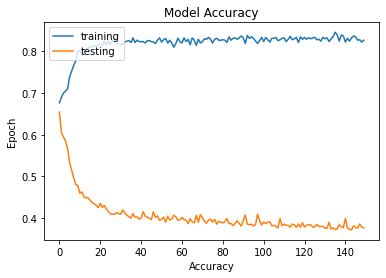

In [56]:
fig=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left");

In [57]:
history=model.fit(x,y,validation_split=0.2,epochs=200,batch_size=10,verbose=2)

Epoch 1/200
72/72 - 0s - loss: 0.3943 - accuracy: 0.8272 - val_loss: 0.3015 - val_accuracy: 0.8659
Epoch 2/200
72/72 - 0s - loss: 0.3979 - accuracy: 0.8146 - val_loss: 0.3089 - val_accuracy: 0.8659
Epoch 3/200
72/72 - 0s - loss: 0.3992 - accuracy: 0.8062 - val_loss: 0.3026 - val_accuracy: 0.8603
Epoch 4/200
72/72 - 0s - loss: 0.3878 - accuracy: 0.8272 - val_loss: 0.3061 - val_accuracy: 0.8771
Epoch 5/200
72/72 - 0s - loss: 0.3937 - accuracy: 0.8244 - val_loss: 0.3001 - val_accuracy: 0.8603
Epoch 6/200
72/72 - 0s - loss: 0.3945 - accuracy: 0.8272 - val_loss: 0.3058 - val_accuracy: 0.8715
Epoch 7/200
72/72 - 0s - loss: 0.3860 - accuracy: 0.8343 - val_loss: 0.3090 - val_accuracy: 0.8659
Epoch 8/200
72/72 - 0s - loss: 0.3868 - accuracy: 0.8244 - val_loss: 0.3055 - val_accuracy: 0.8715
Epoch 9/200
72/72 - 0s - loss: 0.3889 - accuracy: 0.8272 - val_loss: 0.3097 - val_accuracy: 0.8603
Epoch 10/200
72/72 - 0s - loss: 0.4048 - accuracy: 0.8076 - val_loss: 0.3157 - val_accuracy: 0.8659
Epoch 11/

72/72 - 0s - loss: 0.3770 - accuracy: 0.8301 - val_loss: 0.3271 - val_accuracy: 0.8715
Epoch 84/200
72/72 - 0s - loss: 0.3807 - accuracy: 0.8413 - val_loss: 0.3114 - val_accuracy: 0.8659
Epoch 85/200
72/72 - 0s - loss: 0.3807 - accuracy: 0.8272 - val_loss: 0.3144 - val_accuracy: 0.8659
Epoch 86/200
72/72 - 0s - loss: 0.3760 - accuracy: 0.8216 - val_loss: 0.3191 - val_accuracy: 0.8715
Epoch 87/200
72/72 - 0s - loss: 0.3769 - accuracy: 0.8399 - val_loss: 0.3293 - val_accuracy: 0.8547
Epoch 88/200
72/72 - 0s - loss: 0.3781 - accuracy: 0.8301 - val_loss: 0.3390 - val_accuracy: 0.8547
Epoch 89/200
72/72 - 0s - loss: 0.3776 - accuracy: 0.8343 - val_loss: 0.3222 - val_accuracy: 0.8547
Epoch 90/200
72/72 - 0s - loss: 0.3742 - accuracy: 0.8174 - val_loss: 0.3163 - val_accuracy: 0.8715
Epoch 91/200
72/72 - 0s - loss: 0.3712 - accuracy: 0.8357 - val_loss: 0.3251 - val_accuracy: 0.8603
Epoch 92/200
72/72 - 0s - loss: 0.3757 - accuracy: 0.8315 - val_loss: 0.3300 - val_accuracy: 0.8715
Epoch 93/200


Epoch 165/200
72/72 - 0s - loss: 0.3637 - accuracy: 0.8357 - val_loss: 0.3247 - val_accuracy: 0.8659
Epoch 166/200
72/72 - 0s - loss: 0.3652 - accuracy: 0.8301 - val_loss: 0.3259 - val_accuracy: 0.8715
Epoch 167/200
72/72 - 0s - loss: 0.3621 - accuracy: 0.8413 - val_loss: 0.3288 - val_accuracy: 0.8492
Epoch 168/200
72/72 - 0s - loss: 0.3597 - accuracy: 0.8469 - val_loss: 0.3232 - val_accuracy: 0.8603
Epoch 169/200
72/72 - 0s - loss: 0.3633 - accuracy: 0.8385 - val_loss: 0.3434 - val_accuracy: 0.8492
Epoch 170/200
72/72 - 0s - loss: 0.3647 - accuracy: 0.8385 - val_loss: 0.3328 - val_accuracy: 0.8715
Epoch 171/200
72/72 - 0s - loss: 0.3634 - accuracy: 0.8385 - val_loss: 0.3245 - val_accuracy: 0.8715
Epoch 172/200
72/72 - 0s - loss: 0.3572 - accuracy: 0.8441 - val_loss: 0.3414 - val_accuracy: 0.8380
Epoch 173/200
72/72 - 0s - loss: 0.3633 - accuracy: 0.8301 - val_loss: 0.3221 - val_accuracy: 0.8715
Epoch 174/200
72/72 - 0s - loss: 0.3686 - accuracy: 0.8272 - val_loss: 0.3344 - val_accurac

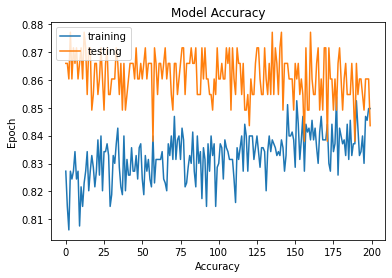

In [58]:
fig=plt.figure(1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left");

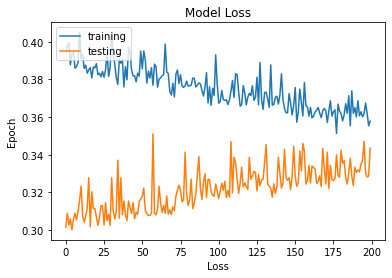

In [59]:
fig=plt.figure(2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend(["training", "testing"], loc= "upper left");